In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/Shareddrives/SWC_Capstone/5월'

/content/drive/Shareddrives/SWC_Capstone/5월


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# Lexicon 불러오기

In [ ]:
lexicon_Val = pd.read_csv("./NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/v-scores.txt", sep = '\t')
lexicon_Val.columns =['Emotion','Score']
lexicon_Val = lexicon_Val.dropna()
lexicon_Val = lexicon_Val.reset_index()
lexicon_Val = lexicon_Val.drop(columns = ['index'])

lexicon_Val_orig = pd.read_csv("./NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/v-scores.txt", sep = '\t')
lexicon_Val_orig.columns =['Emotion','Score']
lexicon_Val_orig = lexicon_Val_orig.dropna()
lexicon_Val_orig = lexicon_Val_orig.reset_index()
lexicon_Val_orig = lexicon_Val_orig.drop(columns = ['index'])

lexicon_Aro = pd.read_csv("./NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/a-scores.txt", sep = '\t')
lexicon_Aro.columns =['Emotion','Score']
lexicon_Aro = lexicon_Aro.dropna()
lexicon_Aro = lexicon_Aro.reset_index()
lexicon_Aro = lexicon_Aro.drop(columns = ['index'])

lexicon_Aro_orig = pd.read_csv("./NRC-VAD-Lexicon-Aug2018Release/OneFilePerDimension/a-scores.txt", sep = '\t')
lexicon_Aro_orig.columns =['Emotion','Score']
lexicon_Aro_orig = lexicon_Aro_orig.dropna()
lexicon_Aro_orig = lexicon_Aro_orig.reset_index()
lexicon_Aro_orig = lexicon_Aro_orig.drop(columns = ['index'])

In [ ]:
# 감정 단어 강도
# Intensity(not normalized)
e_Intensity_original = pd.read_csv("NRC-Emotion-Intensity-Lexicon-v1.txt",sep='\t',header = 0)

print(e_Intensity_original)

           word emotion  emotion-intensity-score
0      outraged   anger                    0.964
1     brutality   anger                    0.959
2        hatred   anger                    0.953
3       hateful   anger                    0.940
4     terrorize   anger                    0.939
...         ...     ...                      ...
9894   fugitive   trust                    0.141
9895    divorce   trust                    0.133
9896   mistakes   trust                    0.133
9897       bait   trust                    0.133
9898  scoundrel   trust                    0.117

[9899 rows x 3 columns]


In [ ]:
e_Intensity_original = e_Intensity_original.sort_values(by=['word'])
e_Intensity_original

,word,emotion,emotion-intensity-score
4768,aaaaaaah,fear,0.344
4988,aaaah,fear,0.234
9506,abacus,trust,0.406
6695,abandon,sadness,0.703
4250,abandon,fear,0.531
...,...,...,...
9814,zealous,trust,0.258
5806,zen,joy,0.515
5778,zest,joy,0.516
1739,zest,anticipation,0.570


In [ ]:
angerDF = e_Intensity_original[e_Intensity_original.emotion == 'anger']
angerDF = angerDF[['word','emotion-intensity-score']]
angerDF.rename(columns = {'emotion-intensity-score': 'anger'},inplace = True)

anticipationDF = e_Intensity_original[e_Intensity_original.emotion == 'anticipation']
anticipationDF = anticipationDF[['word','emotion-intensity-score']]
anticipationDF.rename(columns = {'emotion-intensity-score': 'anticipation'},inplace = True)

disgustDF = e_Intensity_original[e_Intensity_original.emotion == 'disgust']
disgustDF = disgustDF[['word','emotion-intensity-score']]
disgustDF.rename(columns = {'emotion-intensity-score': 'disgust'},inplace = True)

fearDF = e_Intensity_original[e_Intensity_original.emotion == 'fear']
fearDF = fearDF[['word','emotion-intensity-score']]
fearDF.rename(columns = {'emotion-intensity-score': 'fear'},inplace = True)

joyDF = e_Intensity_original[e_Intensity_original.emotion == 'joy']
joyDF = joyDF[['word','emotion-intensity-score']]
joyDF.rename(columns = {'emotion-intensity-score': 'joy'},inplace = True)

sadnessDF = e_Intensity_original[e_Intensity_original.emotion == 'sadness']
sadnessDF = sadnessDF[['word','emotion-intensity-score']]
sadnessDF.rename(columns = {'emotion-intensity-score': 'sadness'},inplace = True)

surpriseDF = e_Intensity_original[e_Intensity_original.emotion == 'surprise']
surpriseDF = surpriseDF[['word','emotion-intensity-score']]
surpriseDF.rename(columns = {'emotion-intensity-score': 'surprise'},inplace = True)

trustDF = e_Intensity_original[e_Intensity_original.emotion == 'trust']
trustDF = trustDF[['word','emotion-intensity-score']]
trustDF.rename(columns = {'emotion-intensity-score': 'trust'},inplace = True)


print(len(angerDF),
     len(anticipationDF),
     len(disgustDF),
     len(fearDF),
     len(joyDF),
     len(sadnessDF),
     len(surpriseDF),
     len(trustDF))
print(len(angerDF)+
     len(anticipationDF)+
     len(disgustDF)+
     len(fearDF)+
     len(joyDF)+
     len(sadnessDF)+
     len(surpriseDF)+
     len(trustDF))


1481 862 1092 1763 1264 1294 583 1560
9899


In [ ]:
lexicon_Inten = pd.merge(angerDF,anticipationDF, how='outer',on='word')
lexicon_Inten = pd.merge(lexicon_Inten,disgustDF, how='outer',on='word')
lexicon_Inten = pd.merge(lexicon_Inten,fearDF, how='outer',on='word')
lexicon_Inten = pd.merge(lexicon_Inten,joyDF, how='outer',on='word')
lexicon_Inten = pd.merge(lexicon_Inten,sadnessDF, how='outer',on='word')
lexicon_Inten = pd.merge(lexicon_Inten,surpriseDF, how='outer',on='word')
lexicon_Inten = pd.merge(lexicon_Inten,trustDF, how='outer',on='word')
lexicon_Inten = lexicon_Inten.fillna(0)
lexicon_Inten

,word,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,abandoned,0.222,0.0,0.000,0.534,0.0,0.828,0.000,0.000
1,abandonment,0.438,0.0,0.000,0.609,0.0,0.859,0.523,0.000
2,abhor,0.816,0.0,0.609,0.547,0.0,0.000,0.000,0.000
3,abhorrent,0.875,0.0,0.680,0.672,0.0,0.000,0.000,0.000
4,abolish,0.485,0.0,0.000,0.000,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
5956,worthy,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.643
5957,wot,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.234
5958,xxx,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.234
5959,youll,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.328


In [ ]:
lexicon_Inten.to_csv('./Intensity_lexicon_original.csv', mode='w', index = False)

# Valence

In [ ]:
lexicon_Val

,Emotion,Score
0,love,1.000
1,happy,1.000
2,happily,1.000
3,generous,1.000
4,magnificent,1.000
...,...,...
20000,bankruptcy,0.010
20001,angered,0.010
20002,toxic,0.008
20003,nightmare,0.005


In [ ]:
Val_mean = lexicon_Val[['Score']].mean(axis=0)
Val_std = lexicon_Val[['Score']].std()
print(Val_mean)
print(Val_std)

Score    0.499995
dtype: float64
Score    0.215668
dtype: float64


In [ ]:
for index in range(len(lexicon_Val)):
    lexicon_Val['Score'][index] = (lexicon_Val['Score'][index] - Val_mean) / Val_std
lexicon_Val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Emotion,Score
0,love,2.318405
1,happy,2.318405
2,happily,2.318405
3,generous,2.318405
4,magnificent,2.318405
...,...,...
20000,bankruptcy,-2.271987
20001,angered,-2.271987
20002,toxic,-2.281261
20003,nightmare,-2.295171


In [ ]:
lexicon_Val.to_csv('./Val_lex_Zscore.csv', mode='w', index = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


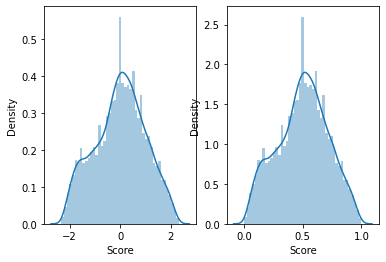

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(lexicon_Val['Score'], ax=ax[0])
sns.distplot(lexicon_Val_orig['Score'], ax=ax[1])

# Arousal

In [ ]:
lexicon_Aro

,Emotion,Score
0,exorcism,0.980
1,homicide,0.973
2,terrorism,0.971
3,aggresive,0.971
4,bloodbath,0.971
...,...,...
20000,slow,0.073
20001,cotton,0.071
20002,mellow,0.069
20003,siesta,0.046


In [ ]:
Aro_mean = lexicon_Aro[['Score']].mean(axis=0)
Aro_std = lexicon_Aro[['Score']].std()
print(Aro_mean)
print(Aro_std)

Score    0.499951
dtype: float64
Score    0.171054
dtype: float64


In [ ]:
for index in range(len(lexicon_Aro)):
    lexicon_Aro['Score'][index] = (lexicon_Aro['Score'][index] - Aro_mean) / Aro_std
lexicon_Aro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Emotion,Score
0,exorcism,2.806411
1,homicide,2.765489
2,terrorism,2.753796
3,aggresive,2.753796
4,bloodbath,2.753796
...,...,...
20000,slow,-2.496000
20001,cotton,-2.507692
20002,mellow,-2.519384
20003,siesta,-2.653845


In [ ]:
lexicon_Aro.to_csv('./Aro_lex_Zscore.csv', mode='w', index = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


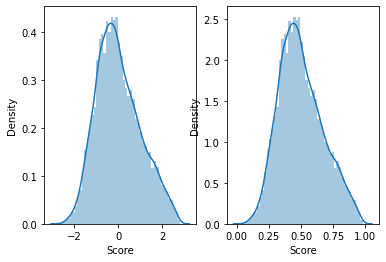

In [ ]:
fig, ax = plt.subplots(ncols=2)

sns.distplot(lexicon_Aro['Score'], ax=ax[0])
sns.distplot(lexicon_Aro_orig['Score'], ax=ax[1])

# Category

In [ ]:
lexicon_Inten

,word,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,abandoned,0.222,0.0,0.000,0.534,0.0,0.828,0.000,0.000
1,abandonment,0.438,0.0,0.000,0.609,0.0,0.859,0.523,0.000
2,abhor,0.816,0.0,0.609,0.547,0.0,0.000,0.000,0.000
3,abhorrent,0.875,0.0,0.680,0.672,0.0,0.000,0.000,0.000
4,abolish,0.485,0.0,0.000,0.000,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
5956,worthy,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.643
5957,wot,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.234
5958,xxx,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.234
5959,youll,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.328


In [ ]:
columns = lexicon_Inten.columns[1:]
for col in columns:
    mean = lexicon_Inten[[col]].mean(axis=0)
    std = lexicon_Inten[[col]].std()
    for index in range(len(lexicon_Aro)):
        lexicon_Aro['Score'][index] = (lexicon_Aro['Score'][index] - Aro_mean) / Aro_std



anger    0.124131
dtype: float64
anticipation    0.072344
dtype: float64
disgust    0.091723
dtype: float64
fear    0.147595
dtype: float64
joy    0.1064
dtype: float64
sadness    0.108971
dtype: float64
surprise    0.048942
dtype: float64
trust    0.130966
dtype: float64
